<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
#https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/ 

In [18]:
## Load Libraries
from ipywidgets import widgets
from IPython.display import display
from IPython.html.widgets import *


In [3]:
txt = widgets.Text()
display( txt )

def handle_submit(sender):
    print( txt.value )
    
txt.on_submit( handle_submit )

A Jupyter Widget

Hellow there
put some text here
the quick brown fox jumped over the lazy dogs
Button was clicked


In [29]:
button = widgets.Button(description="Click me!!")
display( button )
def handle_button( sender ):
    print( "clicked" )
    txt.value = "Button was clicked"
button.on_click( handle_button )


A Jupyter Widget

clicked
clicked
clicked
clicked


In [15]:
def fx( x):
    print( "%f squared is %f" % (x, x**2))
interact( fx, x=10)

A Jupyter Widget

<function __main__.fx>

In [28]:
import math
import pandas as pd
import numpy as npt
import matplotlib.pyplot as plt 
%matplotlib inline 

t = (0,1,2,3,4,5,6,7,8,9,10)

def plotfs( f ):
    plt.plot( 1, sin(2*pi*t*fr))
    plt.show()
    
interact( plotfs, f=(1,10,0.1))

A Jupyter Widget

<function __main__.plotfs>

In [30]:
print("The quick brown fox jumped over the lazy dogs")

The quick brown fox jumped over the lazy dogs


In [43]:
from scipy.io import wavfile
rate, wx = wavfile.read(r"C:\Users\BILHA\Music\Minions Banana Song.wav")

ValueError: only 1-dimensional arrays can be used

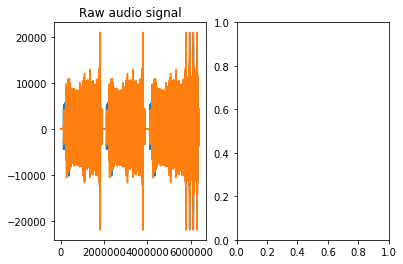

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2) 
ax1.plot(wx); ax1.set_title( "Raw audio signal" )
ax2.specgram( wx ); ax2.set_title("Spectogram"); 

In [49]:
#import folium


In [51]:
qks = pd.read_csv( 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv')
qks.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-10-30T12:28:08.750Z,38.821999,-122.841667,1.51,1.96,md,30.0,59.0,0.005303,0.06,...,2018-10-30T12:29:45.332Z,"9km NW of The Geysers, CA",earthquake,0.19,0.29,0.110,7.0,automatic,nc,nc
1,2018-10-30T12:09:42.140Z,33.484667,-116.784333,4.79,0.25,ml,16.0,90.0,0.030700,0.12,...,2018-10-30T12:13:16.466Z,"9km ENE of Aguanga, CA",earthquake,0.27,0.89,0.182,5.0,automatic,ci,ci
2,2018-10-30T12:07:19.900Z,33.926998,-116.820663,4.26,1.58,ml,69.0,54.0,0.033160,0.17,...,2018-10-30T12:18:15.730Z,"3km WNW of Cabazon, CA",earthquake,0.21,0.52,0.242,20.0,automatic,ci,ci
3,2018-10-30T12:05:11.030Z,33.845167,-117.095833,14.11,1.16,ml,29.0,61.0,0.071770,0.19,...,2018-10-30T12:08:54.757Z,"7km NE of Nuevo, CA",earthquake,0.35,0.60,0.202,27.0,automatic,ci,ci
4,2018-10-30T12:02:56.300Z,37.612499,-118.958832,5.01,1.10,md,14.0,170.0,0.004666,0.02,...,2018-10-30T12:25:03.349Z,"3km SSE of Mammoth Lakes, CA",earthquake,0.63,1.48,0.260,14.0,automatic,nc,nc


In [57]:
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm
import folium

norm = Normalize( qks['mag'].min(), qks['mag'].max() )

map = folium.Map( location=[48, -102], zoom_start=3)

for eq in qks.iterrows():
    color = rgb2hex(cm.OrRd(norm(float(eq[1]['mag']))))
    map.circle_marker([eq[1]['latitude'], eq[1]['longitude']], 
                    popup=eq[1]['place'], 
                    radius=20000*float(eq[1]['mag']),
                    line_color=color,
                    fill_color=color)
map.create_map( path="results/earthquake.html" ) 

# need to replace CDN with https URLs
with open('results/earthquake.html', 'r') as f:
    contents = f.read()
    contents = contents.replace("http://cdn.leafletjs.com/leaflet-0.5/", "//cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.7/")
    with open('results/earthquake2.html', 'w') as f:
        f.writelines(contents)

AttributeError: 'Map' object has no attribute 'circle_marker'

In [53]:
%%HTML
<iframe width="100%" height="350" src="https://app.dominodatalab.com/r00sj3/jupyter/raw/latest/results/earthquake2.html?inline=true"></iframe>